In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [7]:
df = pd.read_csv("20220527 South Australia.csv")

#Convert date column to datetime and set it as index
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

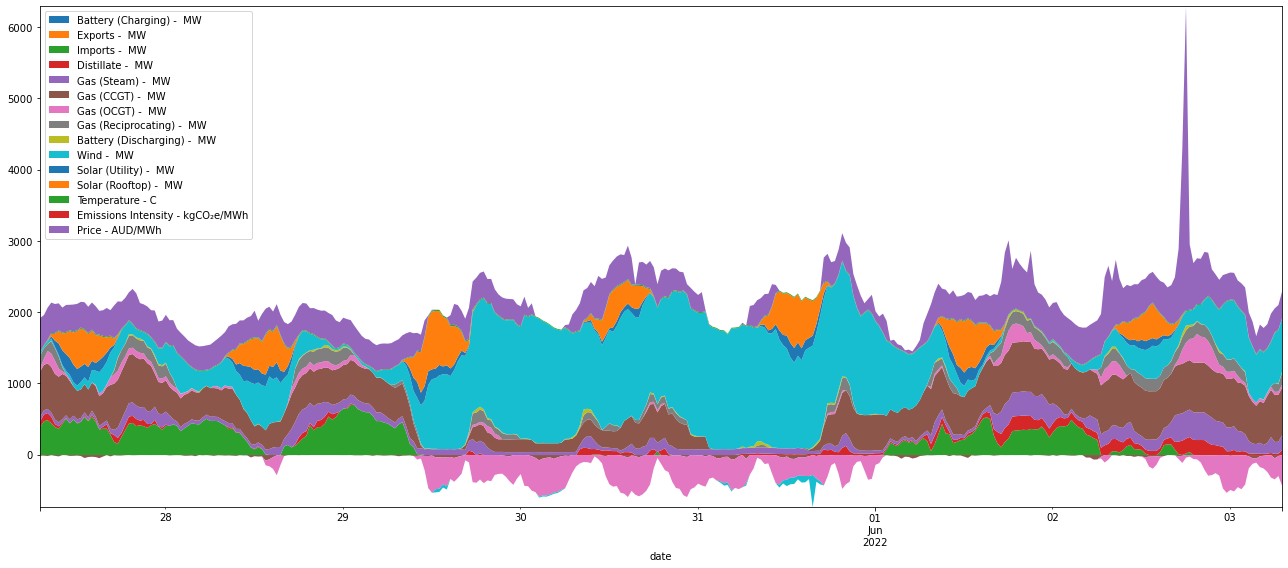

In [10]:
fig, ax = plt.subplots(figsize=(18,8))

# split dataframe df into negative only and positive only values
df_neg, df_pos = df.clip(upper=0), df.clip(lower=0)
# stacked area plot of positive values
df_pos.plot.area(ax=ax, stacked=True, linewidth=0.)
# reset the color cycle
#ax.set_prop_cycle(None)
# stacked area plot of negative values, prepend column names with '_' such that they don't appear in the legend
df_neg.rename(columns=lambda x: '_' + x).plot.area(ax=ax, stacked=True, linewidth=0.)
# rescale the y axis
ax.set_ylim([df_neg.sum(axis=1).min(), df_pos.sum(axis=1).max()])

plt.tight_layout()
plt.savefig("simple_plot.png", dpi=300)
plt.show()